# **Nicholas Salim**
# **CAKAP Data Scientist B**

# Load Dataset
Dataset feature encoded (mapped), outlier handled


In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# Upload file
uploaded = files.upload()

# After uploading, you can load the file
file_name = list(uploaded.keys())[0]  # Get the file name from the uploaded dictionary
df = pd.read_csv(file_name)

display(df)


Saving garments_model (4).csv to garments_model (4).csv


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,1,3,8,0.80,26.16,1108.0,7080.0,98.0,0.0,0.0,0.0,59.0,0.940725
1,0,0,3,1,0.75,3.94,1039.0,960.0,0.0,0.0,0.0,0.0,8.0,0.886500
2,0,1,3,11,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
3,0,1,3,12,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
4,0,1,3,6,0.80,25.90,1170.0,1920.0,50.0,0.0,0.0,0.0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,2,10,0.75,2.90,1039.0,960.0,0.0,0.0,0.0,0.0,8.0,0.628333
1193,1,0,2,8,0.70,3.90,1039.0,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1194,1,0,2,7,0.65,3.90,1039.0,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1195,1,0,2,9,0.75,2.90,1039.0,1800.0,0.0,0.0,0.0,0.0,15.0,0.505889


Target variable distribution

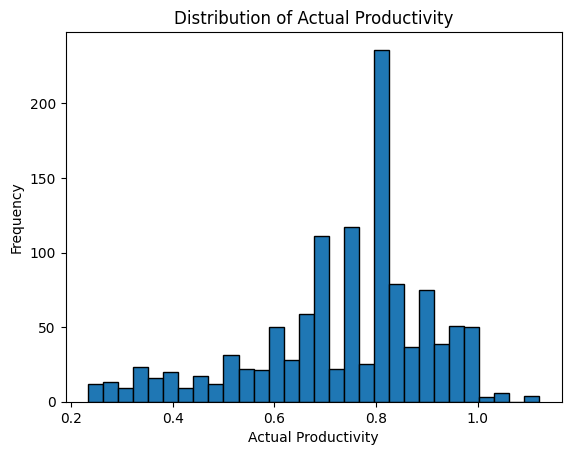

Number of samples with actual_productivity > 0.5: 1064
Number of samples with actual_productivity <= 0.5: 133


In [21]:
import matplotlib.pyplot as plt

# Plot the distribution of 'actual_productivity'
plt.hist(df['actual_productivity'], bins=30, edgecolor='black')
plt.title('Distribution of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.show()

# Check how many values are above and below 0.5
num_high = df[df['actual_productivity'] > 0.5].shape[0]
num_low = df[df['actual_productivity'] <= 0.5].shape[0]

print(f"Number of samples with actual_productivity > 0.5: {num_high}")
print(f"Number of samples with actual_productivity <= 0.5: {num_low}")


Feature distribution

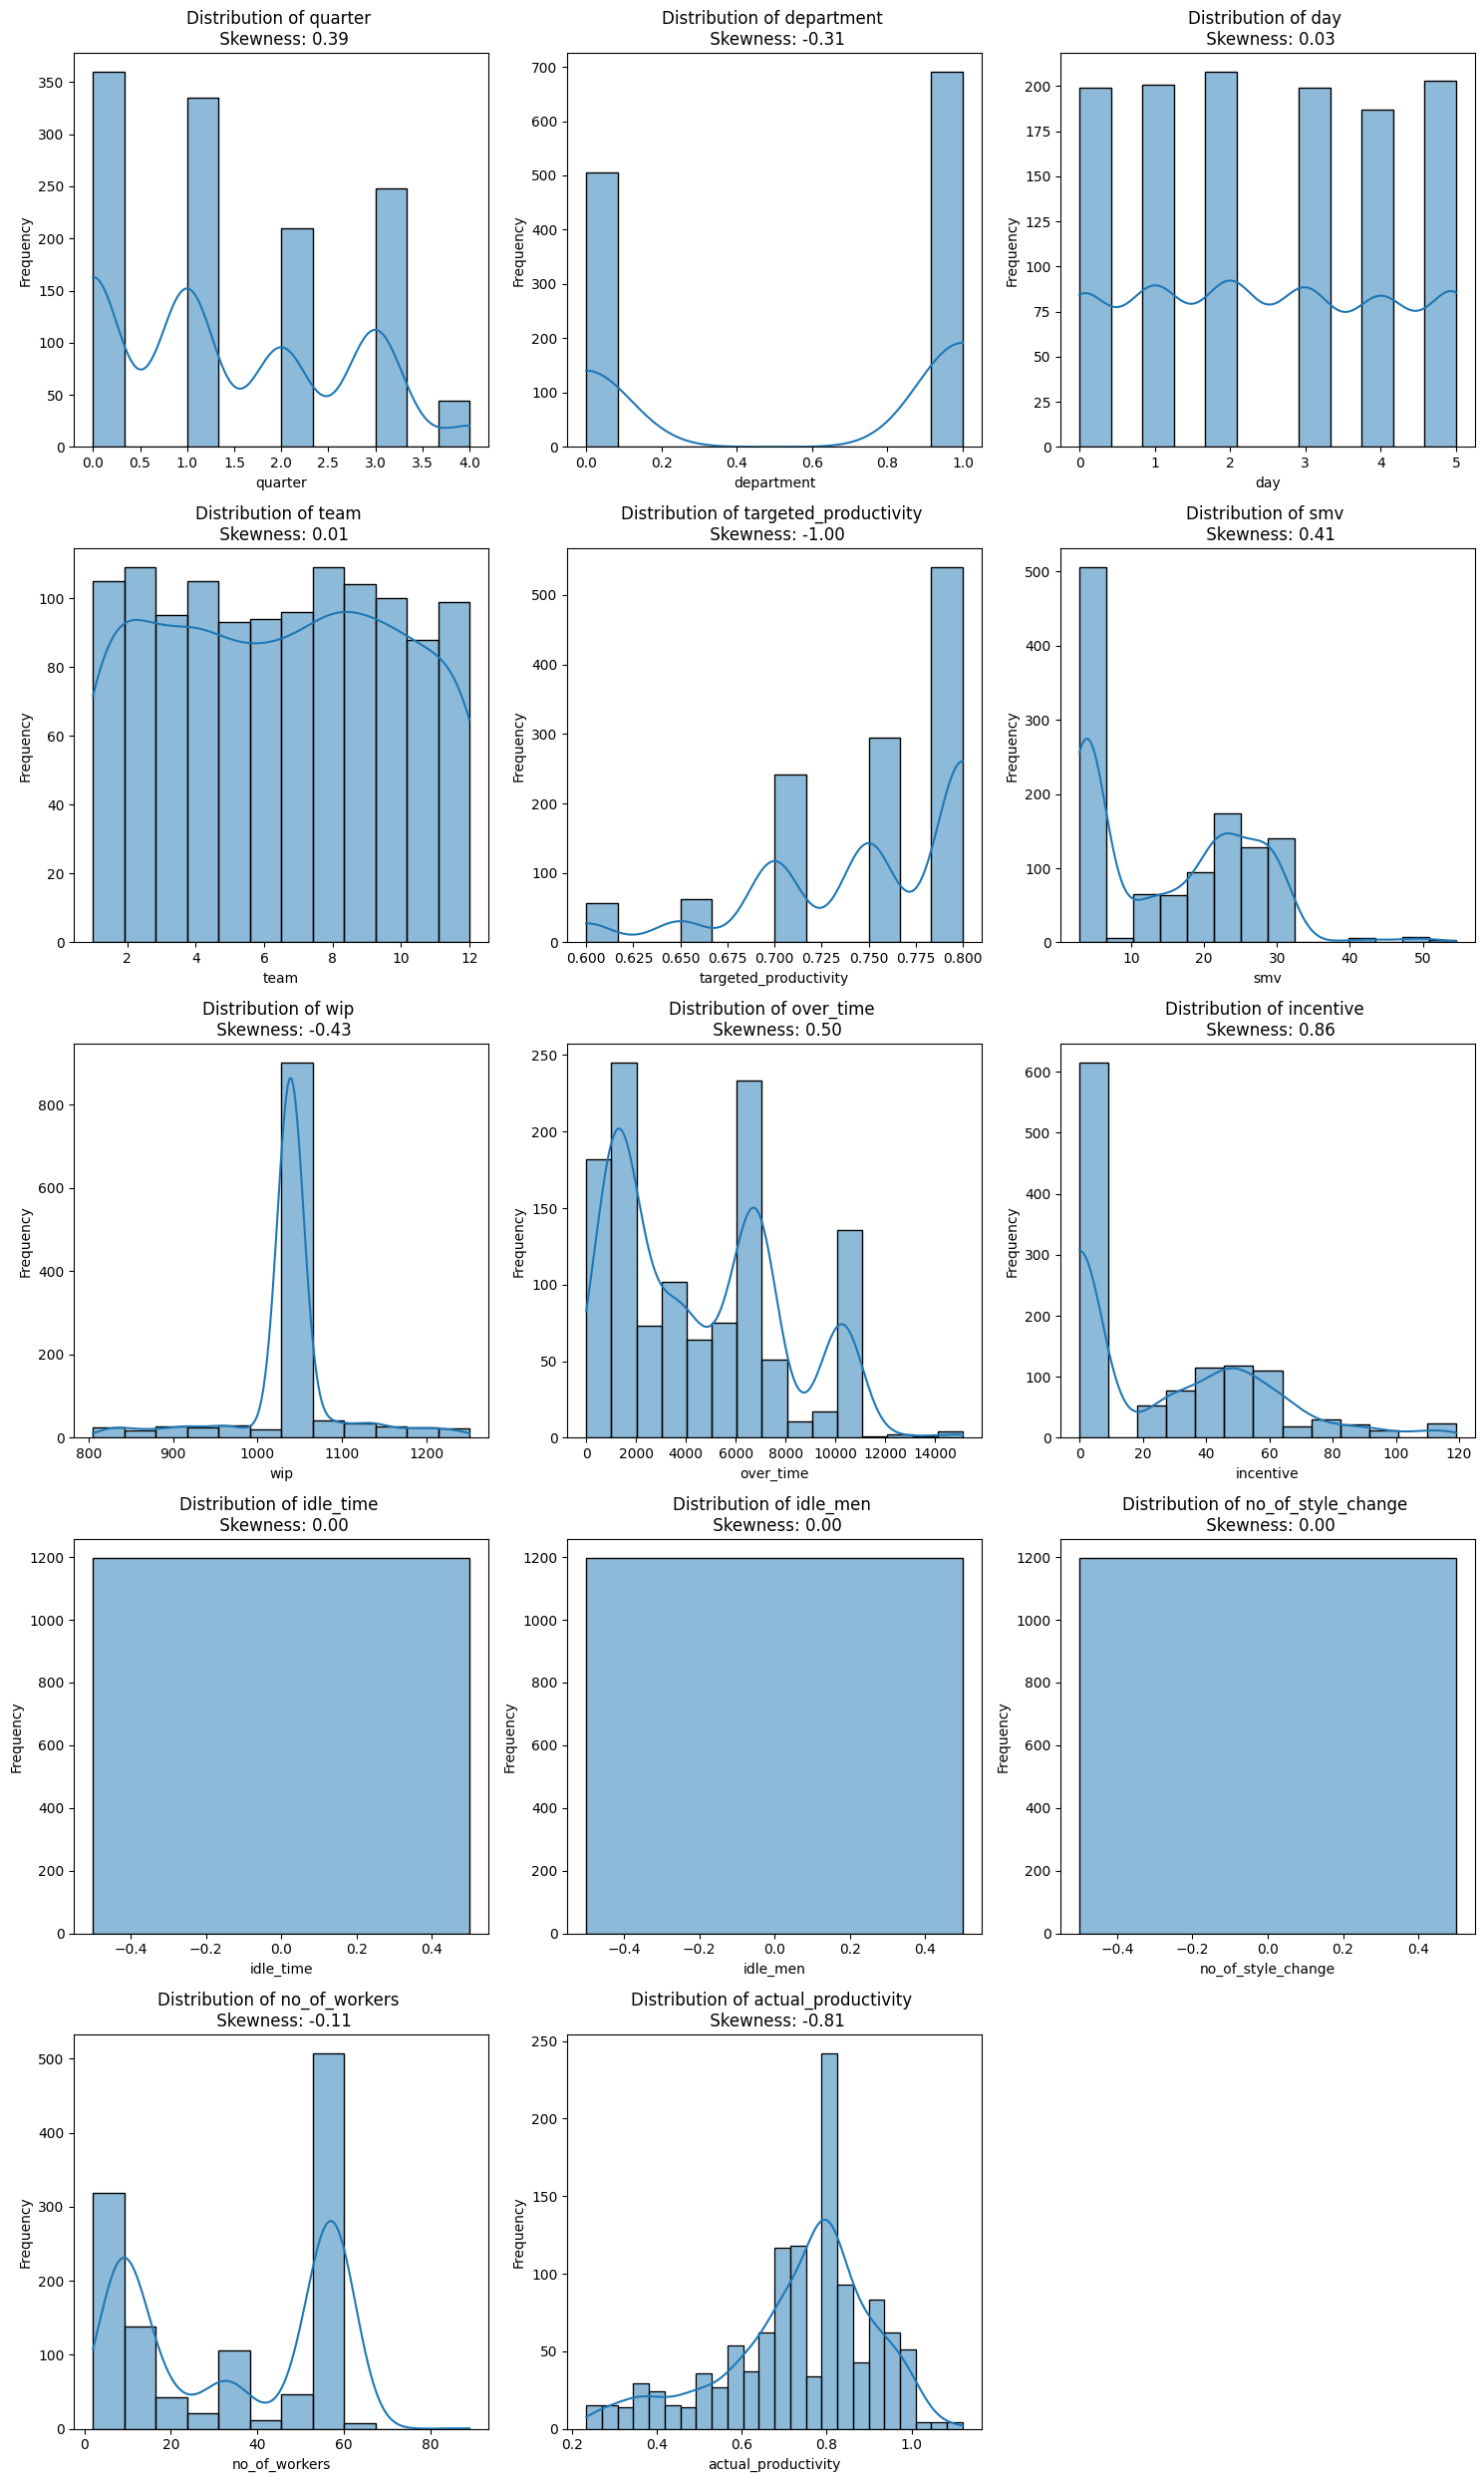

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your original DataFrame
# Create a subplot to visualize the distributions and skewness for all columns
n_cols = len(df.columns)
n_rows = (n_cols // 3) + (n_cols % 3 > 0)  # Adjust rows based on the number of columns

fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 5))

# Flatten axes for easy indexing
axes = axes.flatten()

# Loop through each column and plot the distribution
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column} \n Skewness: {df[column].skew():.2f}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Modeling


Feature Scaling (Standard scaler)

Scale mean = 0 dengan standard deviation 1
untuk balancing feature (semua fitur berkontribusi dengan baik)



In [23]:
import pandas as pd

# Step 1: Data preparation (Assuming 'df' is your DataFrame)
X = df[['targeted_productivity', 'smv', 'wip', 'incentive', 'over_time']]

# Step 2: Create a temporary DataFrame
temp_df = X.copy()

# Step 3: Display the temporary DataFrame
print("Temporary DataFrame of Selected Features:")
display(temp_df.head())


Temporary DataFrame of Selected Features:


,targeted_productivity,smv,wip,incentive,over_time
0,0.80,26.16,1108.0,98.0,7080.0
1,0.75,3.94,1039.0,0.0,960.0
2,0.80,11.41,968.0,50.0,3660.0
3,0.80,11.41,968.0,50.0,3660.0
4,0.80,25.90,1170.0,50.0,1920.0


In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Data preparation (Assuming 'df' is your DataFrame)
X = df[['targeted_productivity', 'smv', 'wip', 'incentive', 'over_time']]

# Step 2: Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Create a temporary DataFrame for scaled features
scaled_features_df = pd.DataFrame(X_scaled, columns=X.columns)

# Step 4: Display the scaled features
print("Scaled Features (Temporary DataFrame):")
display(scaled_features_df.head())


Scaled Features (Temporary DataFrame):


,targeted_productivity,smv,wip,incentive,over_time
0,0.878899,1.014552,1.106882,2.398763,0.769258
1,-0.000735,-1.016778,0.023018,-0.846564,-1.090905
2,0.878899,-0.333878,-1.092263,0.809215,-0.270245
3,0.878899,-0.333878,-1.092263,0.809215,-0.270245
4,0.878899,0.990783,2.080789,0.809215,-0.799115


Feature Selection (MI, Multicolinearity, Corelation matrix)

**Source :** *Capstone Data Preprocessing.ipynb*

Corelation: ***day (low corelation)***

MI: ***team, quarter, no_of_style_change, idle_men, idle_time, day (low predictive value)***

Multicolinearity test: ***department, no_of_worker (high colinearity dengan smv)***

# Random Forest

Random Forest
MAE: 0.07289077384751774
MSE: 0.013206628769721066
RMSE: 0.11492009732732159
MAPE: 11.79964895236826
SMAPE: 11.21368993574975
R2: 0.5026213945897345

Comparison of Actual vs Predicted Values:
    Actual Value  Predicted Value  Difference
0       0.268214         0.485813   -0.217599
1       0.800359         0.770364    0.029995
2       0.681061         0.689144   -0.008084
3       0.325000         0.583151   -0.258151
4       0.667604         0.611229    0.056376
5       0.800980         0.733583    0.067397
6       0.768847         0.714805    0.054042
7       0.768847         0.714805    0.054042
8       0.650417         0.637154    0.013263
9       0.750396         0.749142    0.001254
10      0.700398         0.743962   -0.043564
11      0.861679         0.922291   -0.060612
12      0.800319         0.805846   -0.005528
13      0.816406         0.683030    0.133376
14      0.900145         0.872346    0.027799
15      0.935322         0.658001    0.277321
16      1.00

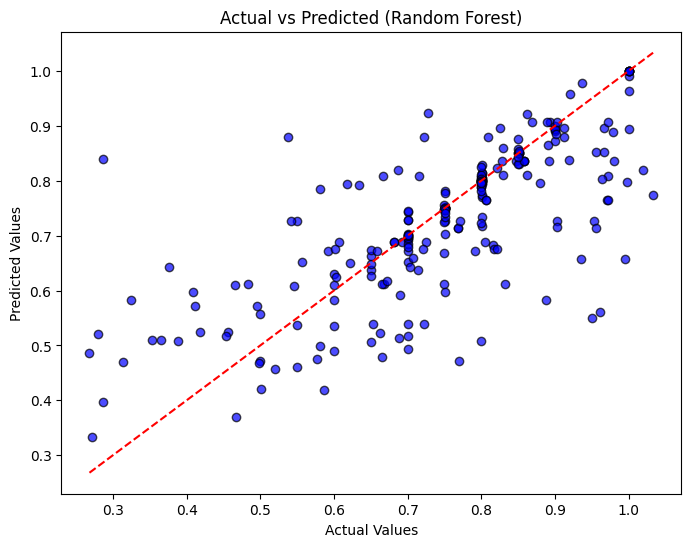

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Data preparation (Assuming 'df' is your DataFrame)
X = df[['targeted_productivity', 'smv','wip', 'incentive', 'over_time']]

y = df['actual_productivity']

# Step 2: Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate using metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# SMAPE (Symmetric Mean Absolute Percentage Error)
smape = 100 * np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred)))

# Print evaluation metrics
print('Random Forest')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"SMAPE: {smape}")
print(f"R2: {r2}")

# Step 7: Create a comparison DataFrame for Actual vs Predicted values
comparison_df = pd.DataFrame({
    'Actual Value': y_test.values,
    'Predicted Value': y_pred,
    'Difference': y_test.values - y_pred
})

# Display the first few rows of the comparison
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head(20))  # Show first 20 rows for example

# Step 8: Create a scatter plot for Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()


# Linear Regression

Linear Regression
MAE: 0.09775572236675509
MSE: 0.018046470788110235
RMSE: 0.1343371534167307
MAPE: 16.178731879795027
SMAPE: 14.393897069893002
R2: 0.3203467266569543

Comparison of Actual vs Predicted Values:
    Actual Value  Predicted Value  Difference
0       0.268214         0.511261   -0.243047
1       0.800359         0.862656   -0.062298
2       0.681061         0.770589   -0.089529
3       0.325000         0.703757   -0.378757
4       0.667604         0.772377   -0.104772
5       0.800980         0.608271    0.192709
6       0.768847         0.725801    0.043046
7       0.768847         0.725801    0.043046
8       0.650417         0.604436    0.045981
9       0.750396         0.768308   -0.017912
10      0.700398         0.767453   -0.067055
11      0.861679         0.744964    0.116715
12      0.800319         0.802289   -0.001970
13      0.816406         0.720253    0.096154
14      0.900145         0.817042    0.083103
15      0.935322         0.731656    0.203666
16     

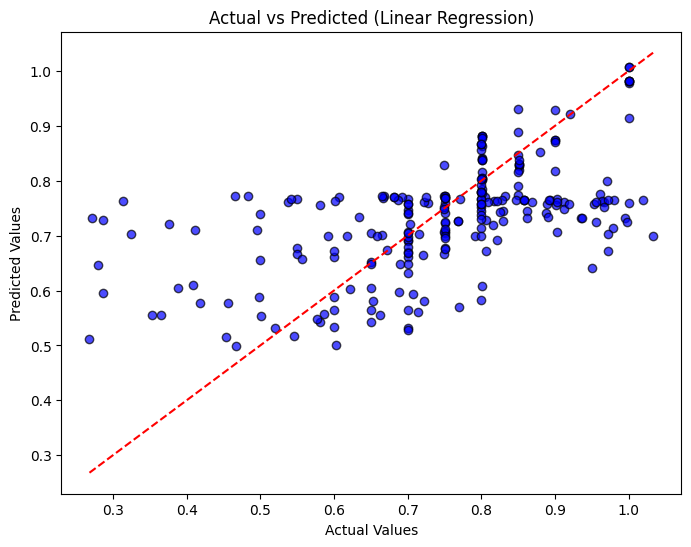

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Data preparation (Assuming 'df' is your DataFrame)
X = df[['targeted_productivity', 'smv', 'wip', 'incentive', 'over_time']]
y = df['actual_productivity']

# Step 2: Scale the features using StandardScaler (Optional for Linear Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train the LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate using metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# SMAPE (Symmetric Mean Absolute Percentage Error)
smape = 100 * np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred)))

# Print evaluation metrics
print('Linear Regression')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"SMAPE: {smape}")
print(f"R2: {r2}")

# Step 7: Create a comparison DataFrame for Actual vs Predicted values
comparison_df = pd.DataFrame({
    'Actual Value': y_test.values,
    'Predicted Value': y_pred,
    'Difference': y_test.values - y_pred
})

# Display the first few rows of the comparison
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head(20))  # Show first 20 rows for example

# Optional: Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()


# K - Nearest Neighbors

K-Nearest Neighbors
MAE: 0.08546589276416668
MSE: 0.016601851220231036
RMSE: 0.12884817119474778
MAPE: 13.88291729757908
SMAPE: 12.945892087928668
R2: 0.3747529554189454

Comparison of Actual vs Predicted Values:
    Actual Value  Predicted Value  Difference
0       0.268214         0.519202   -0.250988
1       0.800359         0.781579    0.018780
2       0.681061         0.659091    0.021970
3       0.325000         0.552825   -0.227825
4       0.667604         0.616563    0.051042
5       0.800980         0.762623    0.038357
6       0.768847         0.778878   -0.010031
7       0.768847         0.778878   -0.010031
8       0.650417         0.650246    0.000171
9       0.750396         0.750359    0.000036
10      0.700398         0.730542   -0.030144
11      0.861679         0.929197   -0.067518
12      0.800319         0.830357   -0.030039
13      0.816406         0.873516   -0.057110
14      0.900145         0.840279    0.059866
15      0.935322         0.681756    0.253566
16   

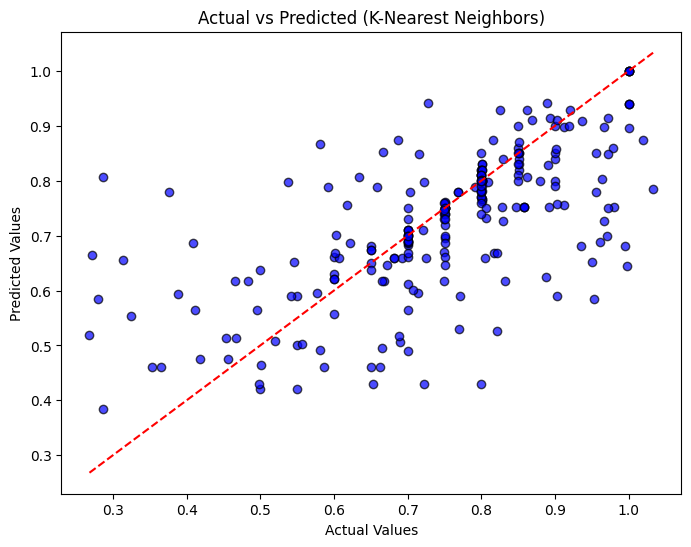

In [27]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Data preparation (Assuming 'df' is your DataFrame)
X = df[['targeted_productivity', 'smv', 'wip', 'incentive', 'over_time']]
y = df['actual_productivity']

# Step 2: Scale the features using StandardScaler (Optional for KNN, recommended for better performance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train the KNeighborsRegressor model
model = KNeighborsRegressor(n_neighbors=5)  # You can adjust 'n_neighbors' as needed
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate using metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# SMAPE (Symmetric Mean Absolute Percentage Error)
smape = 100 * np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred)))

# Print evaluation metrics
print('K-Nearest Neighbors')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"SMAPE: {smape}")
print(f"R2: {r2}")

# Step 7: Create a comparison DataFrame for Actual vs Predicted values
comparison_df = pd.DataFrame({
    'Actual Value': y_test.values,
    'Predicted Value': y_pred,
    'Difference': y_test.values - y_pred
})

# Display the first few rows of the comparison
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head(20))  # Show first 20 rows for example

# Optional: Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (K-Nearest Neighbors)")
plt.show()


# Decision Tree

Decision Tree Regression
MAE: 0.08235975621541756
MSE: 0.018335847558797462
RMSE: 0.13540992415180456
MAPE: 13.354406648289427
SMAPE: 12.968181800145812
R2: 0.3094484257239768

Comparison of Actual vs Predicted Values:
    Actual Value  Predicted Value  Difference
0       0.268214         0.601037   -0.332823
1       0.800359         0.707046    0.093313
2       0.681061         0.691645   -0.010584
3       0.325000         0.584187   -0.259187
4       0.667604         0.615038    0.052566
5       0.800980         0.800980    0.000000
6       0.768847         0.942214   -0.173367
7       0.768847         0.942214   -0.173367
8       0.650417         0.650417    0.000000
9       0.750396         0.750372    0.000024
10      0.700398         0.800416   -0.100018
11      0.861679         0.911590   -0.049911
12      0.800319         0.800319    0.000000
13      0.816406         0.657691    0.158715
14      0.900145         0.850502    0.049643
15      0.935322         0.657247    0.278075

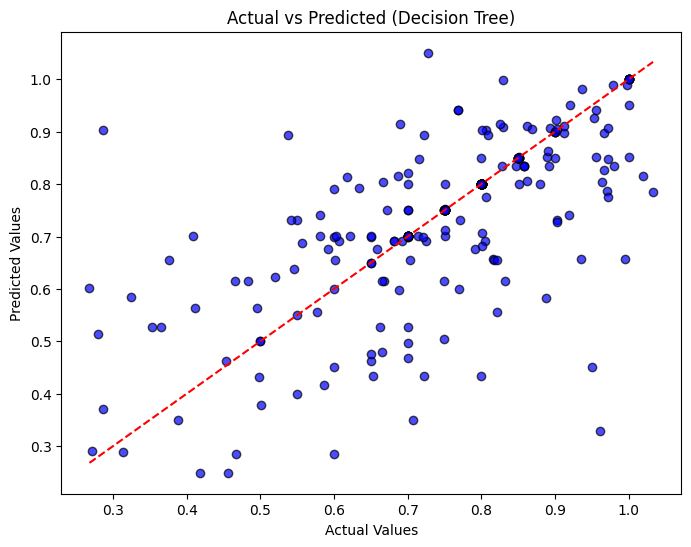

In [28]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Data preparation (Assuming 'df' is your DataFrame)
X = df[['targeted_productivity', 'smv', 'wip', 'incentive', 'over_time']]
y = df['actual_productivity']

# Step 2: Scale the features using StandardScaler (Optional, not strictly necessary for Decision Tree)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train the DecisionTreeRegressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate using metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# SMAPE (Symmetric Mean Absolute Percentage Error)
smape = 100 * np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred)))

# Print evaluation metrics
print('Decision Tree Regression')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"SMAPE: {smape}")
print(f"R2: {r2}")

# Step 7: Create a comparison DataFrame for Actual vs Predicted values
comparison_df = pd.DataFrame({
    'Actual Value': y_test.values,
    'Predicted Value': y_pred,
    'Difference': y_test.values - y_pred
})

# Display the first few rows of the comparison
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head(20))  # Show first 20 rows for example

# Optional: Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Decision Tree)")
plt.show()


# Support Vector Machine + RBF (Radial basis function)

Support Vector Regression (RBF Kernel)
MAE: 0.09635868898872155
MSE: 0.01831482553207895
RMSE: 0.135332278234274
MAPE: 15.951504793095861
SMAPE: 14.277844250978292
R2: 0.3102401422562173

Comparison of Actual vs Predicted Values:
    Actual Value  Predicted Value  Difference
0       0.268214         0.417986   -0.149771
1       0.800359         0.811984   -0.011625
2       0.681061         0.769880   -0.088819
3       0.325000         0.712237   -0.387237
4       0.667604         0.762683   -0.095079
5       0.800980         0.791336    0.009645
6       0.768847         0.795044   -0.026197
7       0.768847         0.795044   -0.026197
8       0.650417         0.619742    0.030675
9       0.750396         0.741680    0.008715
10      0.700398         0.787251   -0.086853
11      0.861679         0.820255    0.041424
12      0.800319         0.884469   -0.084151
13      0.816406         0.791195    0.025211
14      0.900145         0.926067   -0.025922
15      0.935322         0.775730 

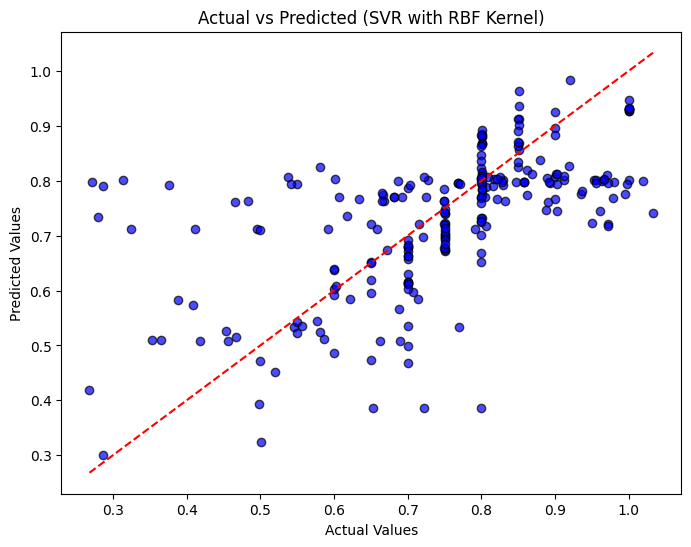

In [29]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Data preparation (Assuming 'df' is your DataFrame)
X = df[['targeted_productivity', 'smv', 'wip', 'incentive', 'over_time']]
y = df['actual_productivity']

# Step 2: Scale the features using StandardScaler (SVR is sensitive to feature scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train the SVR model with RBF kernel
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate using metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# SMAPE (Symmetric Mean Absolute Percentage Error)
smape = 100 * np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred)))

# Print evaluation metrics
print('Support Vector Regression (RBF Kernel)')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"SMAPE: {smape}")
print(f"R2: {r2}")

# Step 7: Create a comparison DataFrame for Actual vs Predicted values
comparison_df = pd.DataFrame({
    'Actual Value': y_test.values,
    'Predicted Value': y_pred,
    'Difference': y_test.values - y_pred
})

# Display the first few rows of the comparison
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head(20))  # Show first 20 rows for example

# Optional: Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (SVR with RBF Kernel)")
plt.show()


# XGBoost

XGBoost Regression
MAE: 0.07198379235831642
MSE: 0.013381717344938527
RMSE: 0.11567937303140317
MAPE: 11.65002866856592
SMAPE: 11.20328174134487
R2: 0.49602733391888476

Comparison of Actual vs Predicted Values:
    Actual Value  Predicted Value    Difference
0       0.268214         0.378825 -1.106111e-01
1       0.800359         0.798454  1.904490e-03
2       0.681061         0.693728 -1.266736e-02
3       0.325000         0.585370 -2.603695e-01
4       0.667604         0.614179  5.342521e-02
5       0.800980         0.800981 -8.911879e-07
6       0.768847         0.655340  1.135073e-01
7       0.768847         0.655340  1.135073e-01
8       0.650417         0.621886  2.853090e-02
9       0.750396         0.759098 -8.702242e-03
10      0.700398         0.745177 -4.477876e-02
11      0.861679         0.924554 -6.287492e-02
12      0.800319         0.811226 -1.090755e-02
13      0.816406         0.708774  1.076321e-01
14      0.900145         0.876926  2.321845e-02
15      0.935322    

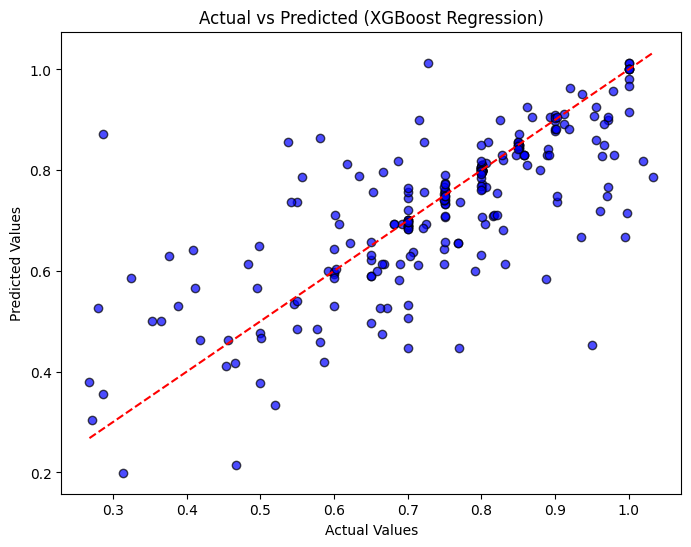

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

# Step 1: Data preparation (Assuming 'df' is your DataFrame)
X = df[['targeted_productivity', 'smv', 'wip', 'incentive', 'over_time']]
y = df['actual_productivity']

# Step 2: Scale the features using StandardScaler (XGBoost is less sensitive to scaling, but it can help with optimization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train the XGBoost model
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate using metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# SMAPE (Symmetric Mean Absolute Percentage Error)
smape = 100 * np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred)))

# Print evaluation metrics
print('XGBoost Regression')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"SMAPE: {smape}")
print(f"R2: {r2}")

# Step 7: Create a comparison DataFrame for Actual vs Predicted values
comparison_df = pd.DataFrame({
    'Actual Value': y_test.values,
    'Predicted Value': y_pred,
    'Difference': y_test.values - y_pred
})

# Display the first few rows of the comparison
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head(20))  # Show first 20 rows for example

# Optional: Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (XGBoost Regression)")
plt.show()


# Polynomial Regression

Polynomial Regression
MAE: 0.09256011847407182
MSE: 0.01766947712285625
RMSE: 0.13292658546301506
MAPE: 15.470758084738897
SMAPE: 13.785329169496539
R2: 0.334544792396671

Comparison of Actual vs Predicted Values:
    Actual Value  Predicted Value  Difference
0       0.268214         0.515850   -0.247636
1       0.800359         0.784206    0.016153
2       0.681061         0.791001   -0.109940
3       0.325000         0.704290   -0.379290
4       0.667604         0.791415   -0.123811
5       0.800980         0.551306    0.249675
6       0.768847         0.733829    0.035019
7       0.768847         0.733829    0.035019
8       0.650417         0.585672    0.064745
9       0.750396         0.736850    0.013545
10      0.700398         0.750119   -0.049721
11      0.861679         0.783543    0.078136
12      0.800319         0.823033   -0.022714
13      0.816406         0.725042    0.091364
14      0.900145         0.857988    0.042157
15      0.935322         0.736701    0.198621
16  

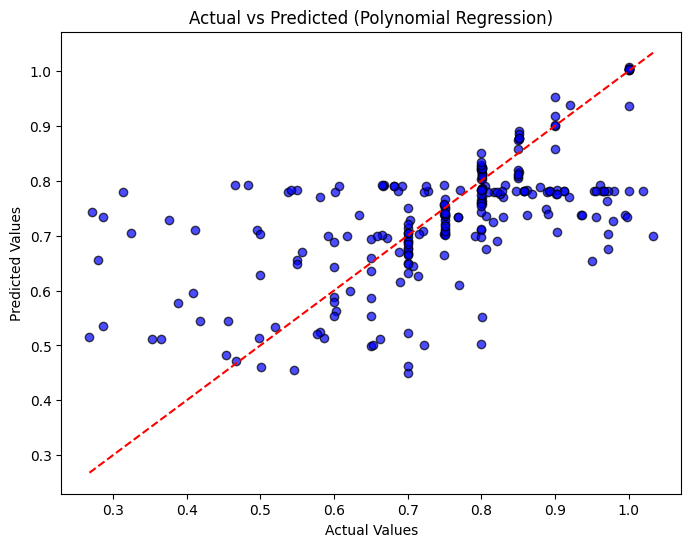

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Data preparation (Assuming 'df' is your DataFrame)
X = df[['targeted_productivity', 'smv', 'wip', 'incentive', 'over_time']]
y = df['actual_productivity']

# Step 2: Scale the features using StandardScaler (optional, but recommended for better performance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Apply Polynomial Features (degree=2 for quadratic features)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Step 5: Train the Polynomial Regression model using Linear Regression
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_poly_test)

# Step 7: Evaluate using metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# SMAPE (Symmetric Mean Absolute Percentage Error)
smape = 100 * np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred)))

# Print evaluation metrics
print('Polynomial Regression')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"SMAPE: {smape}")
print(f"R2: {r2}")

# Step 8: Create a comparison DataFrame for Actual vs Predicted values
comparison_df = pd.DataFrame({
    'Actual Value': y_test.values,
    'Predicted Value': y_pred,
    'Difference': y_test.values - y_pred
})

# Display the first few rows of the comparison
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head(20))  # Show first 20 rows for example

# Optional: Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Polynomial Regression)")
plt.show()


Best Model after comparison : Random Forest Regression

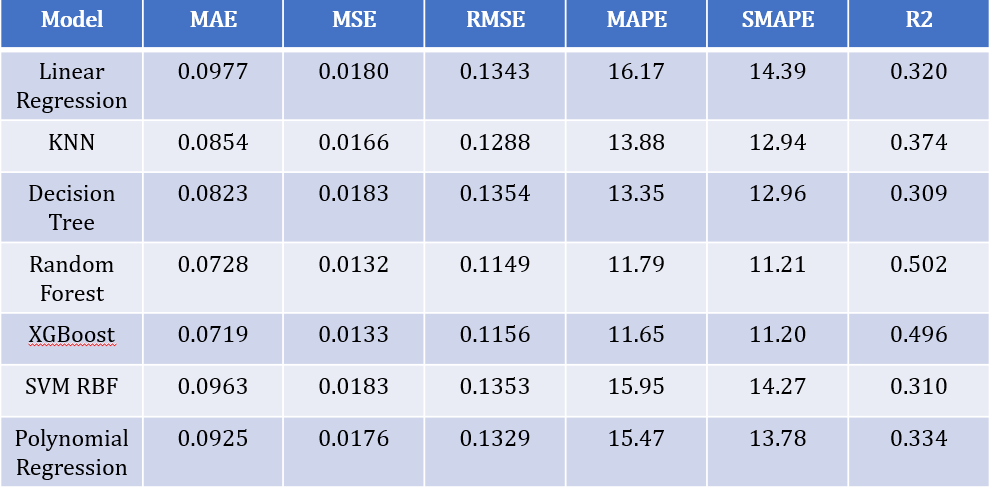

Hyperparameter Tuning

Implementasi GridSearch untuk hyperparameter tuning, coba setiap paramter dalam grid sampai menemukan kombinasi terbaik.



Cross Validation

Implementasi kFold Cross validation untuk split data ke 5 fold(k) lalu training dan testing berdasarkan fold.

Ex: fold1 test | fold2,fold3,fold4,fold5 train. fold2 test, fold1,3,4,5 train, etc.

Random Forest + CV + HT

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest with K-Fold CV and Hyperparameter Tuning
MAE: 0.07276073105257325
MSE: 0.013314675078518435
RMSE: 0.1153892329401597
MAPE: 11.89827331811308
SMAPE: 11.23841996603862
R2: 0.4985522317983512

Comparison of Actual vs Predicted Values:
    Actual Value  Predicted Value  Difference
0       0.268214         0.488002   -0.219788
1       0.800359         0.789094    0.011265
2       0.681061         0.689144   -0.008084
3       0.325000         0.580856   -0.255856
4       0.667604         0.611649    0.055955
5       0.800980         0.738974    0.062007
6       0.768847         0.713708    0.055139
7       0.768847         0.713708    0.055139
8       0.650417         0.636190    0.014227
9       0.750396         0.749584    0.000811
10      0.700398         0.740432   -0.040034
11    

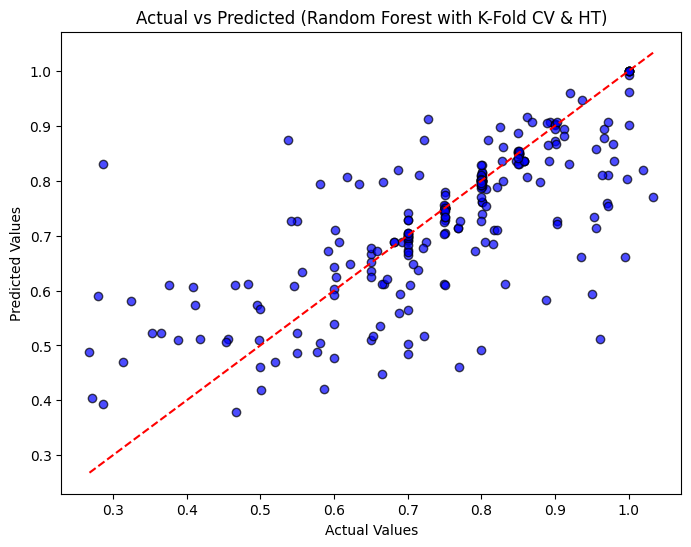

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Data preparation (Assuming 'df' is your DataFrame)
X = df[['targeted_productivity', 'smv', 'wip', 'incentive', 'over_time']]
y = df['actual_productivity']

# Step 2: Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Define the RandomForestRegressor model
base_model = RandomForestRegressor(random_state=42)

# Step 4: Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 5: Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Step 6: Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=kf,
    scoring='neg_mean_absolute_error',  # Using MAE for scoring
    verbose=1,
    n_jobs=-1
)

# Step 7: Fit the model with GridSearchCV
grid_search.fit(X_scaled, y)

# Get the best estimator and hyperparameters
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Step 8: Train-test split for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the best model on the training data
best_model.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = best_model.predict(X_test)

# Step 10: Evaluate using metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# SMAPE (Symmetric Mean Absolute Percentage Error)
smape = 100 * np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred)))

# Print evaluation metrics
print('Random Forest with K-Fold CV and Hyperparameter Tuning')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"SMAPE: {smape}")
print(f"R2: {r2}")

# Step 11: Create a comparison DataFrame for Actual vs Predicted values
comparison_df = pd.DataFrame({
    'Actual Value': y_test.values,
    'Predicted Value': y_pred,
    'Difference': y_test.values - y_pred
})

# Display the first few rows of the comparison
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head(20))  # Show first 20 rows for example

# Step 12: Create a scatter plot for Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Random Forest with K-Fold CV & HT)")
plt.show()


XGBoost + CV + HT

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
XGBoost Regression with HT + kFoldCV
MAE: 0.06958973497200362
MSE: 0.0123366972980349
RMSE: 0.11107068604287497
MAPE: 11.495618399621183
SMAPE: 10.796803940742091
R2: 0.5353841313739914

Comparison of Actual vs Predicted Values:
    Actual Value  Predicted Value  Difference
0       0.268214         0.385264   -0.117050
1       0.800359         0.794277    0.006082
2       0.681061         0.697610   -0.016549
3       0.325000         0.586138   -0.261138
4       0.667604         0.614559    0.053045
5       0.800980         0.795917    0.005063
6       0.768847         0.821707   -0.052860
7       0.768847         0.821707   -0.052860
8       0.650417         0.632582    0.017835
9       0.750396         0.747635    0.002761
10      0.700398         0.770681   -0.070283
11      0.861679         0.927

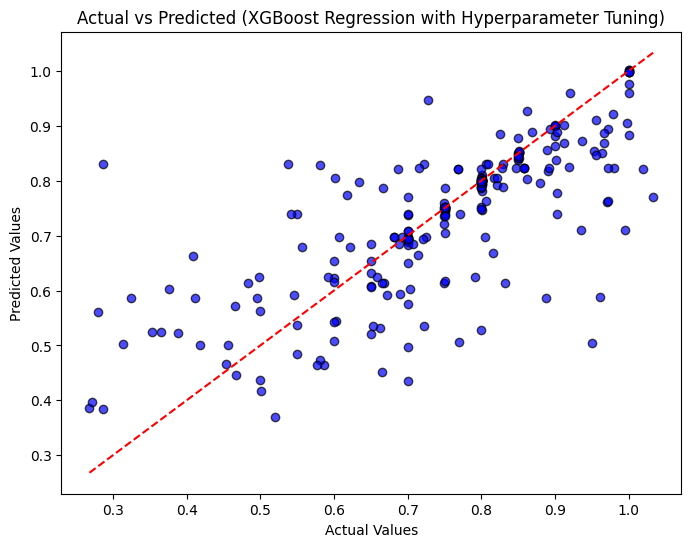

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Step 1: Data preparation (Assuming 'df' is your DataFrame)
X = df[['targeted_productivity', 'smv', 'wip', 'incentive', 'over_time']]
y = df['actual_productivity']

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Define XGBoost model
model = XGBRegressor(random_state=42)

# Step 4: Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 5: Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Step 6: Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=kf,
    scoring='neg_mean_absolute_error',  # Use MAE as the scoring metric
    verbose=1,
    n_jobs=-1
)

# Fit the model with GridSearchCV
grid_search.fit(X_scaled, y)

# Get the best estimator and hyperparameters
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Step 7: Train-test split for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the best model on the training data
best_model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = best_model.predict(X_test)

# Step 9: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
smape = 100 * np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred)))

# Print evaluation metrics
print('XGBoost Regression with HT + kFoldCV')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"SMAPE: {smape}")
print(f"R2: {r2}")

# Step 10: Create a comparison DataFrame for Actual vs Predicted values
comparison_df = pd.DataFrame({
    'Actual Value': y_test.values,
    'Predicted Value': y_pred,
    'Difference': y_test.values - y_pred
})

# Display the first few rows of the comparison
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head(20))

# Step 11: Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (XGBoost Regression with Hyperparameter Tuning)")
plt.show()
